<a href="https://colab.research.google.com/github/LeeSuA/MachineLearning-Study/blob/main/MultipleClassification_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 케라스에서 제공하는 로이터 데이터셋(뉴스)을 46개의 토픽으로 분류하는 예제
- 단일 레이블 다중 분류 예제
- 훈련샘플 : 8982개 , 테스트샘플 : 2246개
- 로이터 데이터셋은 토큰화, 정수 인코딩이 돼있는 상태

In [3]:
from keras.datasets import reuters

# num_words는 데이터에서 가장 자주 등장하는 단어 1만 개로 제한
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
     num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print(len(train_data))
print(len(test_data))

8982
2246


In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

In [8]:
# 데이터 준비
# 데이터를 벡터로 변환
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [9]:
# one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [10]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 3.0600 - accuracy: 0.4399 - val_loss: 1.6940 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.5227 - accuracy: 0.6769 - val_loss: 1.3391 - val_accuracy: 0.6920
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0961 - accuracy: 0.7627 - val_loss: 1.1301 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8473 - accuracy: 0.8157 - val_loss: 1.0230 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6508 - accuracy: 0.8643 - val_loss: 0.9422 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5241 - accuracy: 0.8945 - val_loss: 0.9110 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4137 - accuracy: 0.9147 - val_loss: 0.8918 - val_accuracy: 0.8170
Epoch 8/20
16

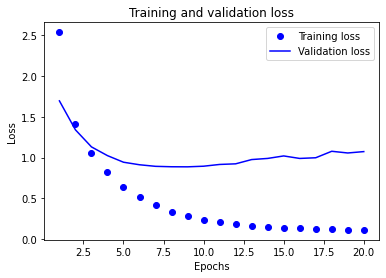

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

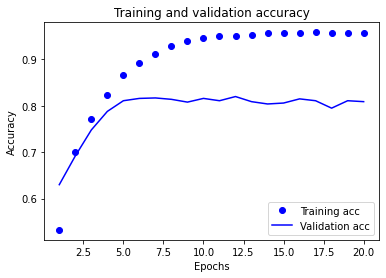

In [16]:
plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# 9번째 에포크 이후 과대적합이 확인되었으므로 모델을 9번의 에포크로 새로 훈련시킴
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 57ms/step - loss: 3.1047 - accuracy: 0.4228 - val_loss: 1.7506 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.5060 - accuracy: 0.6871 - val_loss: 1.3172 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 46ms/step - loss: 1.0901 - accuracy: 0.7647 - val_loss: 1.1432 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8457 - accuracy: 0.8214 - val_loss: 1.0450 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.6643 - accuracy: 0.8686 - val_loss: 0.9633 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.5316 - accuracy: 0.8896 - val_loss: 0.9193 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4169 - accuracy: 0.9150 - val_loss: 0.8929 - val_accuracy: 0.8220
Epoch 8/9
16/16 [===

In [18]:
results

[0.9949156641960144, 0.7938557267189026]